In [1]:
import pandas as pd

df_togo = pd.read_csv('../data/togo-dapaong_qc.csv')

print(df_togo.info())
print(df_togo.head())

print(df_togo.isna().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525600 entries, 0 to 525599
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Timestamp      525600 non-null  object 
 1   GHI            525600 non-null  float64
 2   DNI            525600 non-null  float64
 3   DHI            525600 non-null  float64
 4   ModA           525600 non-null  float64
 5   ModB           525600 non-null  float64
 6   Tamb           525600 non-null  float64
 7   RH             525600 non-null  float64
 8   WS             525600 non-null  float64
 9   WSgust         525600 non-null  float64
 10  WSstdev        525600 non-null  float64
 11  WD             525600 non-null  float64
 12  WDstdev        525600 non-null  float64
 13  BP             525600 non-null  int64  
 14  Cleaning       525600 non-null  int64  
 15  Precipitation  525600 non-null  float64
 16  TModA          525600 non-null  float64
 17  TModB          525600 non-nul

In [2]:
df_togo_clean = df_togo.drop(columns=['Comments'])
df_togo_clean = df_togo_clean.dropna()
print(df_togo_clean.isna().sum())


Timestamp        0
GHI              0
DNI              0
DHI              0
ModA             0
ModB             0
Tamb             0
RH               0
WS               0
WSgust           0
WSstdev          0
WD               0
WDstdev          0
BP               0
Cleaning         0
Precipitation    0
TModA            0
TModB            0
dtype: int64


In [3]:
df_togo_clean.to_csv('../data/togo_clean.csv', index=False)


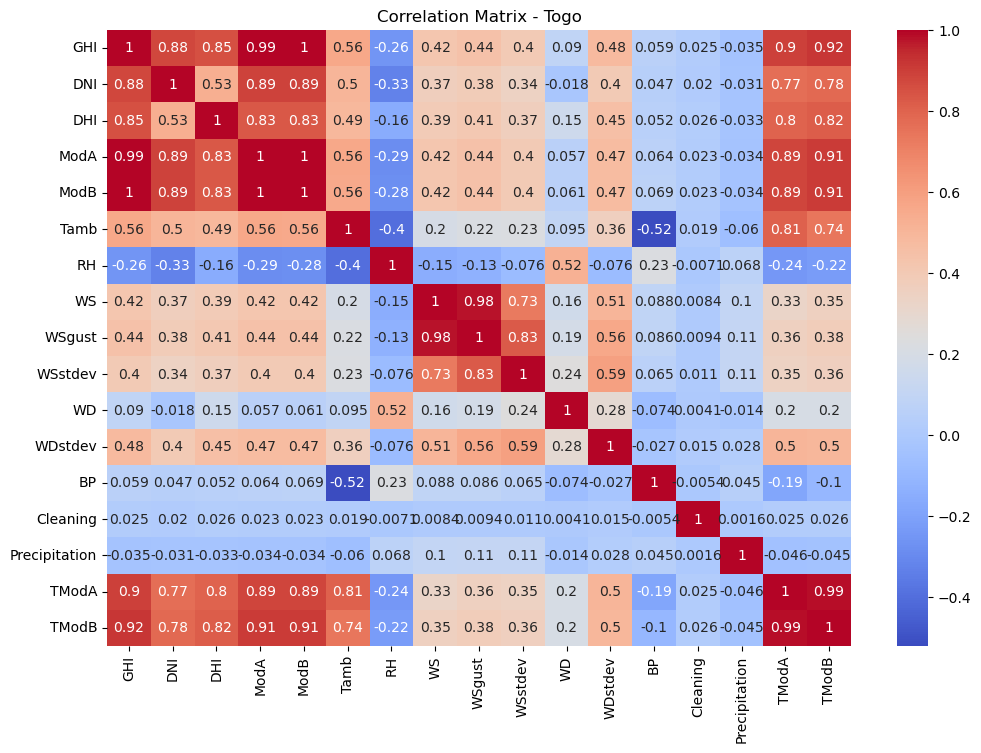

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

numeric_cols = df_togo_clean.select_dtypes(include='number')
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_cols.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix - Togo")
plt.show()


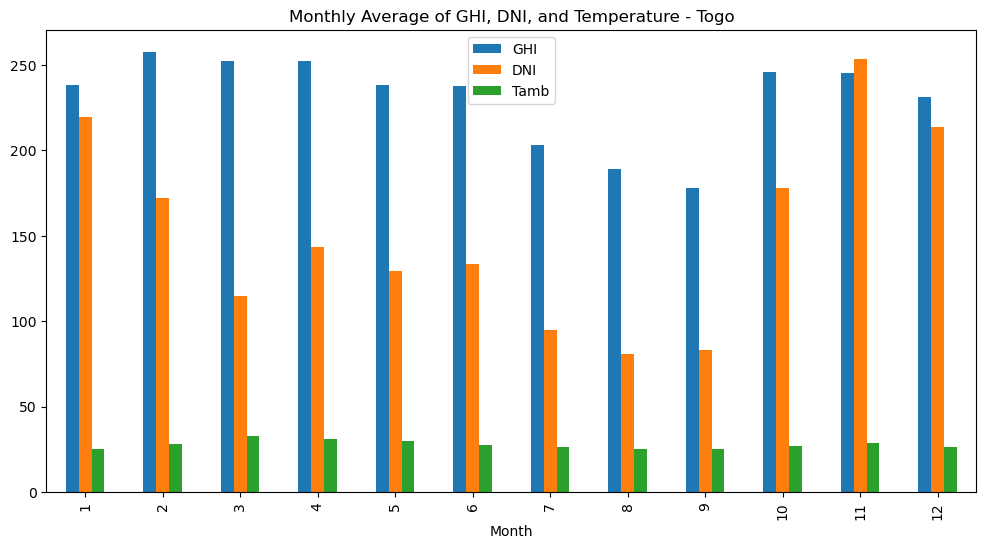

In [6]:
df_togo_clean['Timestamp'] = pd.to_datetime(df_togo_clean['Timestamp'])
df_togo_clean.set_index('Timestamp', inplace=True)

df_togo_clean['Month'] = df_togo_clean.index.month
monthly_avg = df_togo_clean.groupby('Month')[['GHI', 'DNI', 'Tamb']].mean()
monthly_avg.plot(kind='bar', figsize=(12, 6), title="Monthly Average of GHI, DNI, and Temperature - Togo")
plt.show()


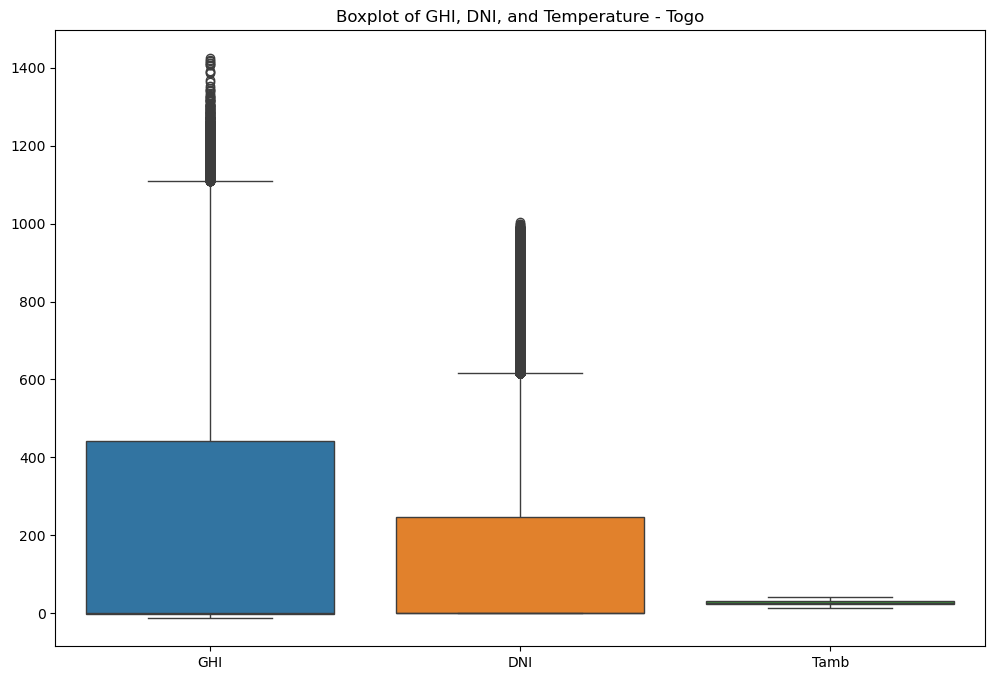

In [7]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df_togo_clean[['GHI', 'DNI', 'Tamb']])
plt.title("Boxplot of GHI, DNI, and Temperature - Togo")
plt.show()

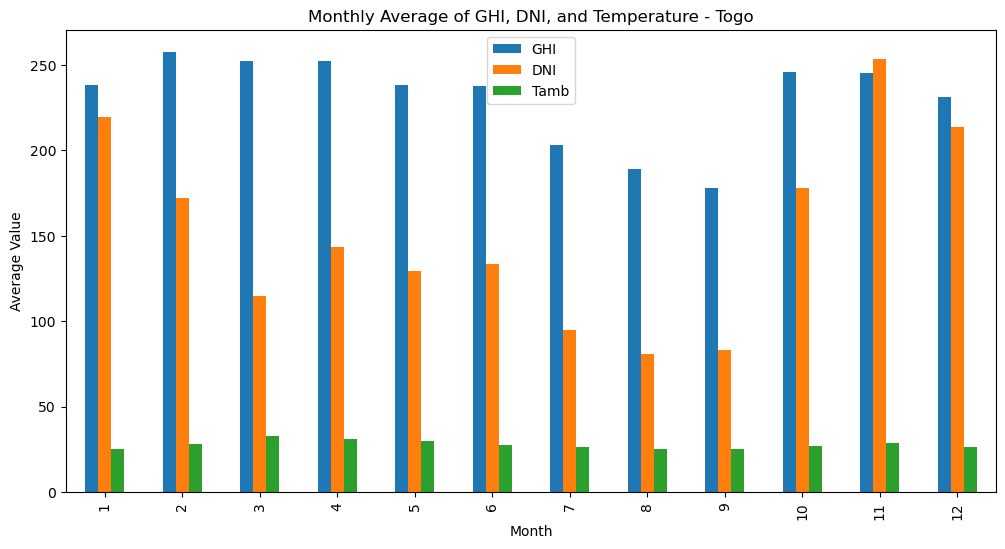

In [8]:
monthly_avg = df_togo_clean.groupby(df_togo_clean.index.month)[['GHI', 'DNI', 'Tamb']].mean()
monthly_avg.plot(kind='bar', figsize=(12, 6))
plt.title("Monthly Average of GHI, DNI, and Temperature - Togo")
plt.xlabel("Month")
plt.ylabel("Average Value")
plt.show()


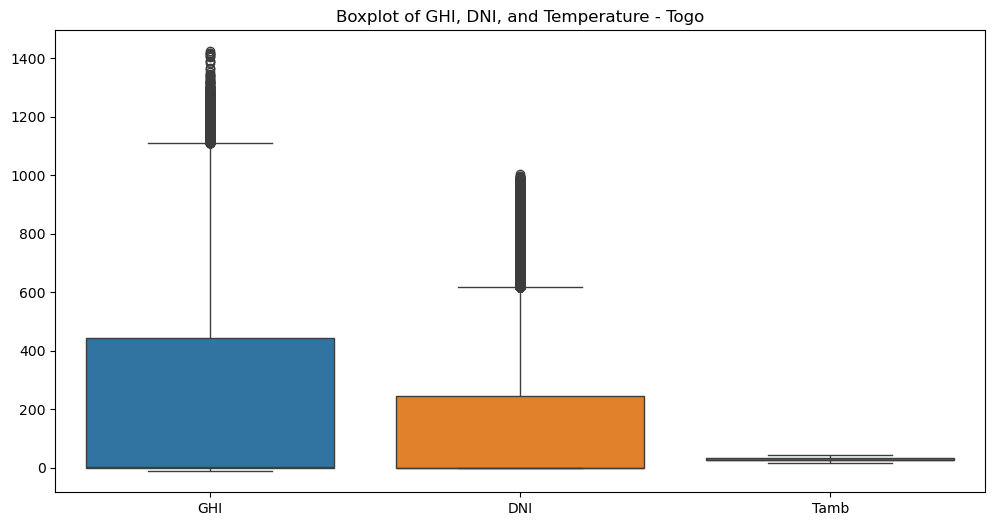

In [9]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_togo_clean[['GHI', 'DNI', 'Tamb']])
plt.title("Boxplot of GHI, DNI, and Temperature - Togo")
plt.show()
